In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Review of NumPy arrays

NumPy arrays are fixed-size containers for homogeneous data. For example,

* an array of integers:

In [3]:
def print_array(a):
    print("{} elements of type {}: {}".format(len(a), a.dtype.name, a))
    
a = np.array([1,2,3])
print_array(a)

3 elements of type int64: [1 2 3]


* or an array of real numbers:

In [4]:
a = np.array([1.5, 2.5, 3.5])
print_array(a)

3 elements of type float64: [ 1.5  2.5  3.5]


* or an array of strings:

In [5]:
a = np.array(['cześć', 'software', 'carpentry'])
print_array(a)

3 elements of type str288: ['cześć' 'software' 'carpentry']


## Accessing (indexing) elements

Single elements can be retrieved by integer (!) index of the element starting from 0:

In [8]:
#indexing
a = np.array([101, 102, 103, 104, 105])
print(a[1]) # second element

102


Sub-array of consecutive elements can be retrived with a slice:

In [10]:
# slicing (first included, last excluded)
print(a[1:3])

[102 103]


# Two-dimensional arrays

2D arrays in NumPy are like matrices &mdash; they have columns and rows. To retrieve an element from the array we need to pass *two* indices or slices.

In [11]:
# ie reshaping a two dimensional array
a = np.arange(12).reshape(3, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
print(a[1, 2])

6


In [13]:
print(a[1:, 2:])

[[ 6  7]
 [10 11]]


<div class="alert alert-success">
    <b>EXERCISE</b>: Add the first and third row of the array <code>a</code>
</div>

In [20]:
result = a[0,:].sum() + a[2,:].sum()
print ("sum of first and third row values = ",result)

a[0,:]+ a[2,:]

sum of first and third row values =  44


array([ 8, 10, 12, 14])

# Pandas data structures

Pandas defines two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created like a NumPy array:

In [23]:
# 
s = pd.Series([0.1, 0.2, 0.3, 0.4])
print(s[2])
s

0.3


0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [25]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

You can access the underlying numpy array representation with the `.values` attribute:

In [26]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [27]:
s[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:
(reals, characters, ...)

In [28]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [29]:
s2['c']

2

It's possible to construct a series directly from a Python dictionary. Let's first define the dictionary. {}

In [33]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
pop_dict['Germany']

81.3

Trying to access non-existing keys in a dictionary will produce an error:

In [35]:
 #pop_dict['Poland']

But we can add new keys easily:

In [36]:
pop_dict['Poland'] = 40
pop_dict

{'Belgium': 11.3,
 'France': 64.3,
 'Germany': 81.3,
 'Netherlands': 16.9,
 'Poland': 40,
 'United Kingdom': 64.9}

NumPy-style arithmetical operations won't work:

In [39]:
#pop_dict * 1000

Now we construct a `Series` object from the dictionary.

In [40]:
population = pd.Series(pop_dict)
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
Poland            40.0
United Kingdom    64.9
dtype: float64

We can index the populations like a dict as expected:

In [41]:
population['France']

64.299999999999997

but with the power of numpy arrays:

In [42]:
population * 1000

Belgium           11300
France            64300
Germany           81300
Netherlands       16900
Poland            40000
United Kingdom    64900
dtype: float64

Many things we have seen for NumPy, can also be used with pandas objects.

Slicing:

In [43]:
population['Belgium':'Germany']

Belgium    11.3
France     64.3
Germany    81.3
dtype: float64

A range of methods:

In [44]:
population.mean()

46.449999999999996

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate how big is the population of each country relative to France
</div>

In [47]:
print(population/population['France']*100)

Belgium            17.573872
France            100.000000
Germany           126.438569
Netherlands        26.283048
Poland             62.208398
United Kingdom    100.933126
dtype: float64


<div class="alert alert-success">
    <b>EXERCISE</b>: Define the following `Series` containing prices of beverages:
    
</div>
```
Beer              5
Coffee            2.5
Orange Juice      5
Water             2
Wine              6
```

In [63]:
bev = {'Beer': 5,
      'Coffee': 2.5,
      'Orange Juice': 5,
      'Water': 2,
      'Wine': 6}
bev
#bevS = pd.Series(bev)
#bevS= pd.Series(['Beer','Coffee','Orange Juice','Water', 'Wine'],
#               [5, 2.5, 5, 2, 6])
bevS = pd.Series({'Beer': 5,
                  'Coffee': 2.5,
                  'Orange Juice': 5,
                  'Water': 2,
                  'Wine': 6})
bevS

Beer            5.0
Coffee          2.5
Orange Juice    5.0
Water           2.0
Wine            6.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img src="img/dataframe.png" width=110%>

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the data frame will display in a rich HTML view:

In [66]:
# keys = indexes, values = lists
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
#countries = pd.DataFrame(data) # automatic columns order
countries = pd.DataFrame(data, columns = ['country', 'population','capital','area'])# to choose the columns order
countries

,country,population,capital,area
0,Belgium,11.3,Brussels,30510
1,France,64.3,Paris,671308
2,Germany,81.3,Berlin,357050
3,Netherlands,16.9,Amsterdam,41526
4,United Kingdom,64.9,London,244820


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [67]:
countries.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [68]:
countries.columns

Index(['country', 'population', 'capital', 'area'], dtype='object')

To check the data types of the different columns:

In [69]:
countries.dtypes

country        object
population    float64
capital        object
area            int64
dtype: object

An overview of that information can be given with the `info()` method:

In [70]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
capital       5 non-null object
area          5 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.0+ bytes


Also a DataFrame has a `values` attribute which returns its `numpy` representation:

In [76]:
countries.values

array([[11.3, 'Brussels', 30510],
       [64.3, 'Paris', 671308],
       [81.3, 'Berlin', 357050],
       [16.9, 'Amsterdam', 41526],
       [64.9, 'London', 244820]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [77]:
# to change the index
countries = countries.set_index('country')  # define a new dataframe with a new index
countries

KeyError: 'country'

To access a Series representing a column in the data, use typical indexing syntax:

In [78]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

For example there's arithmetic. Let's compute density of each country:

In [79]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [82]:
# ie add a new key in a dictionary
countries['density'] = countries['population']*1000000 / countries['area']
countries

,population,capital,area,density
country,,,,
Belgium,11.3,Brussels,30510,370.370370
France,64.3,Paris,671308,95.783158
Germany,81.3,Berlin,357050,227.699202
Netherlands,16.9,Amsterdam,41526,406.973944
United Kingdom,64.9,London,244820,265.092721


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [120]:
countries.sort_values(by='density', ascending=False)

,population,capital,area,density
country,,,,
Netherlands,16.9,Amsterdam,41526,406.973944
Belgium,11.3,Brussels,30510,370.370370
United Kingdom,64.9,London,244820,265.092721
Germany,81.3,Berlin,357050,227.699202
France,64.3,Paris,671308,95.783158


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [84]:
countries.describe()

,population,area,density
count,5.000000,5.000000,5.000000
mean,47.740000,269042.800000,273.183879
std,31.519645,264012.827994,123.440607
min,11.300000,30510.000000,95.783158
25%,16.900000,41526.000000,227.699202
50%,64.300000,244820.000000,265.092721
75%,64.900000,357050.000000,370.370370
max,81.300000,671308.000000,406.973944


The `plot` method can be used to quickly visualize the data in different ways:

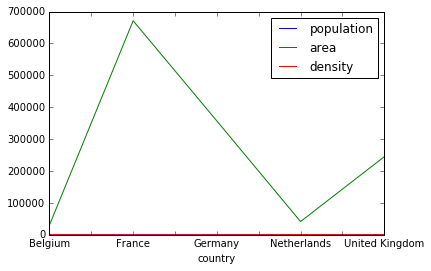

In [86]:
# legends = indexes
countries.plot()

However, for this dataset, it does not say that much:

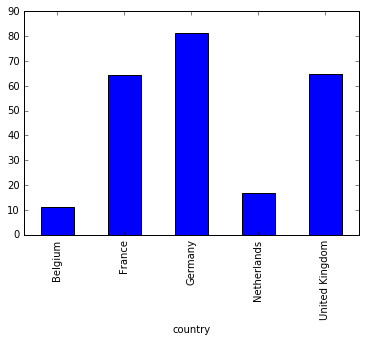

In [87]:
countries['population'].plot(kind='bar')

TypeError: There is no Line2D property "kind"

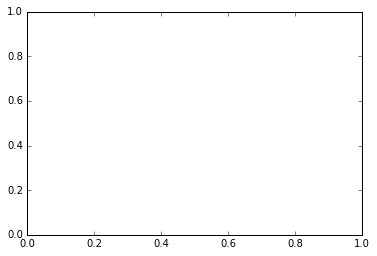

In [118]:
import matplotlib.pyplot as plt
plt.plot(countries['population'].values,kind='bar')

You can play with the `kind` keyword: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

<div class="alert alert-success">
    <b>EXERCISE</b>: Define a `DataFrame` with two columns: price and volume of each beverage. Use the bevarage name as the index. Add the new column ``price of litre``, sort the data frame according to the values of the column, and plot the values as a bar plot.
</div>

In [97]:
bevS

Beer            5.0
Coffee          2.5
Orange Juice    5.0
Water           2.0
Wine            6.0
dtype: float64

,price,volume,price of a litre
names,,,
Water,2.0,50,4.000000
Beer,5.0,33,15.151515
Orange Juice,5.0,20,25.000000
Coffee,2.5,5,50.000000
Wine,6.0,12,50.000000


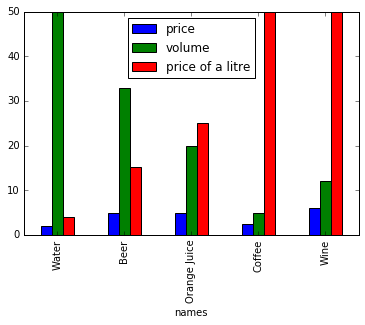

In [113]:
dataNew = {'names':['Beer', 'Coffee', 'Orange Juice', 'Water', 'Wine'],
         'price': [5,2.5,5,2,6],
        'volume': [33,5,20,50,12]}
dataF = pd.DataFrame(dataNew)
dataF = dataF.set_index('names')
dataF['price of a litre'] = dataF['price']/dataF['volume']*100
dataF = dataF.sort_values(by ='price of a litre')
dataF.plot(kind = 'bar')
dataF

In [124]:
pd.DataFrame(bevS, columns=['prices'])

Beer            5.0
Coffee          2.5
Orange Juice    5.0
Water           2.0
Wine            6.0
dtype: float64

## Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [44]:
pd.read_csv

<function pandas.io.parsers._make_parser_function.<locals>.parser_f>

In [45]:
countries.to_csv

<bound method DataFrame.to_csv of                   area    capital  population     density
country                                                  
Belgium          30510   Brussels        11.3  370.370370
France          671308      Paris        64.3   95.783158
Germany         357050     Berlin        81.3  227.699202
Netherlands      41526  Amsterdam        16.9  406.973944
United Kingdom  244820     London        64.9  265.092721>

## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>)*.

> *© 2015, modified by Bartosz Teleńczuk (original sources available from https://github.com/jorisvandenbossche/2015-EuroScipy-pandas-tutorial)*

> *Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---